<a href="https://colab.research.google.com/github/taeyoni/today-I-learned/blob/main/python21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [17]:
question = pd.read_csv('/content/drive/MyDrive/Dart_b-data/schema.csv')
question.shape

(290, 3)

In [18]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [19]:
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [20]:
#판다스로 선다형 객관식 문제에 대한 응답을 가져 옴
mcq = pd.read_csv('/content/drive/MyDrive/Dart_b-data/multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory=False)
mcq.shape

(16716, 228)

In [21]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [22]:
 mcq.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

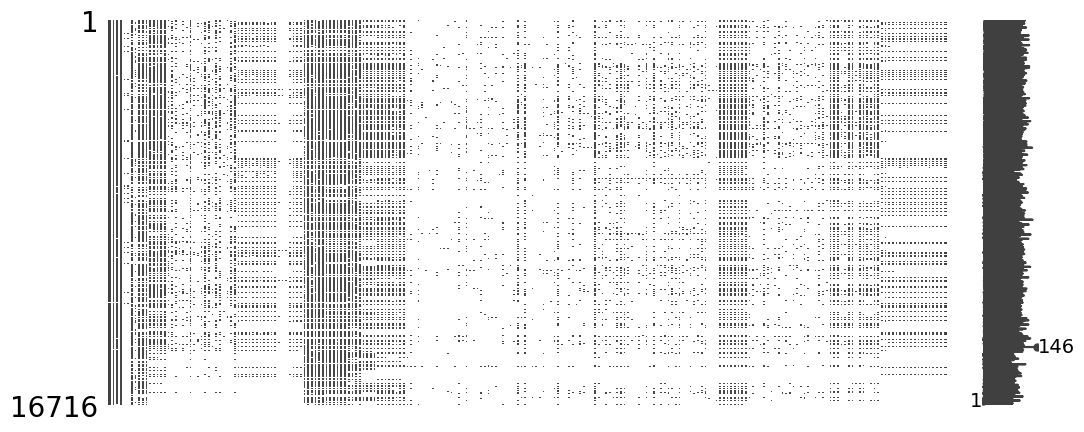

In [23]:
#missingno는 NaN 데이터들에 대해 시각화를 해준다
#NaN 데이터의 컬럼이 많아 아래 그래프만으로는 내용을 파악하기 어렵다ㅏ
import missingno as msno
msno.matrix(mcq, figsize=(12,5))

In [24]:
 #설문통계

<Axes: xlabel='count', ylabel='GenderSelect'>

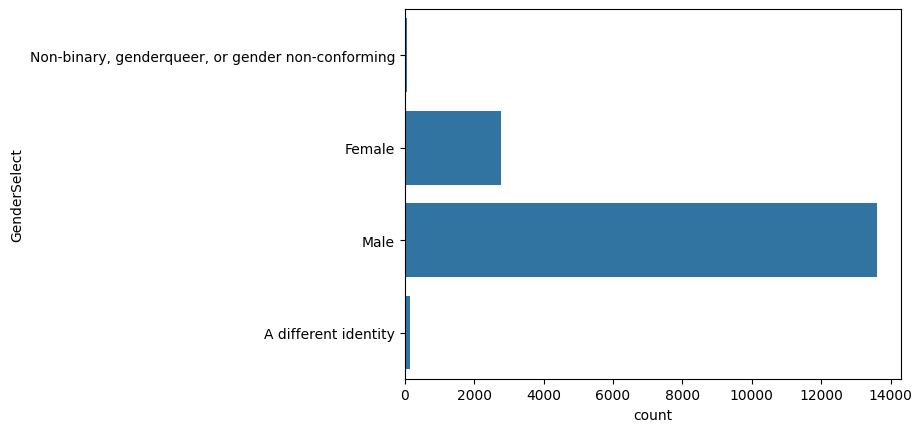

In [25]:
#성별
sns.countplot(y='GenderSelect', data=mcq)
#남성의 비율이 높다.

In [26]:
#국가별 응답수
con_df = pd.DataFrame(mcq['Country'].value_counts())
con_df.head()

,count
Country,
United States,4197
India,2704
Other,1023
Russia,578
United Kingdom,535


In [27]:
#country 컬럼을 인덱스로 지정함
con_df['국가'] = con_df.index
#컬럼 순서대로 응답 수, 국가로 컬럼명 지정
con_df.columns = ['응답수', '국가']
con_df.head()

,응답수,국가
Country,,
United States,4197,United States
India,2704,India
Other,1023,Other
Russia,578,Russia
United Kingdom,535,United Kingdom


In [30]:
 #index 컬럼을 삭제하고 순위를 알기위해 reset_index()를 해준다.
 #우리나라는 18위이고 전체 52개국 참여했지만 20위 까지만 본다.
 con_df = con_df.reset_index(drop=True)
 con_df.head(20)

,응답수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [31]:
#연령
mcq['Age'].describe()

,Age
count,16385.000000
mean,32.372841
std,10.473487
min,0.000000
25%,25.000000
50%,30.000000
75%,37.000000
max,100.000000


<Axes: xlabel='Age', ylabel='Density'>

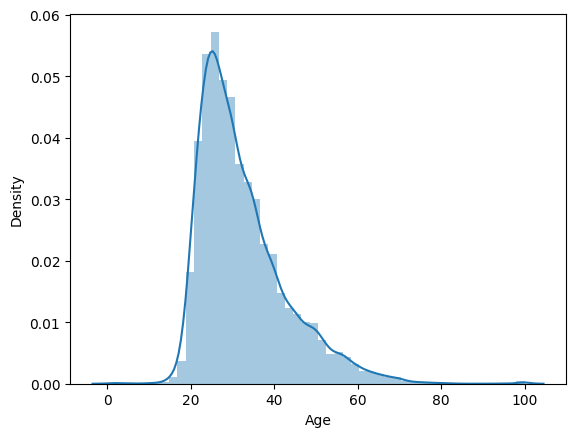

In [32]:
#seaborn으로 0세이상 응답한 사람들
sns.distplot(mcq[mcq['Age']>0]['Age'])

<Axes: xlabel='count', ylabel='FormalEducation'>

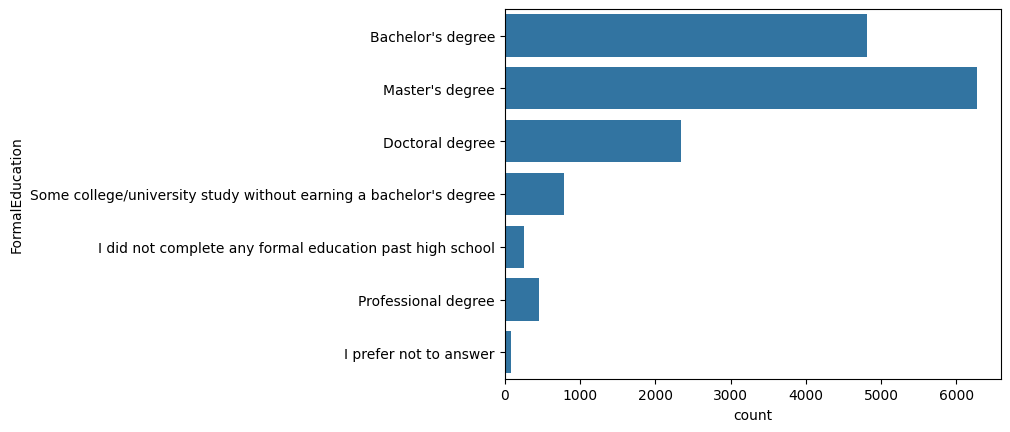

In [33]:
#학력
sns.countplot(y='FormalEducation', data=mcq)

In [34]:
#전공

In [38]:
#value_counts 를 사용하면 그룹화 된 데이터의 카운트 값 보여줌
#normalize=True 옵션 => 해당데이터가 전체 데이터에서 차지하는 비율 알 수 있음
mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())
mcq_major_count

,count
MajorSelect,
Computer Science,4397
Mathematics or statistics,2220
Engineering (non-computer focused),1339
Electrical Engineering,1303
Other,848
Physics,830
"Information technology, networking, or system administration",693
A social science,531
Biology,274


In [39]:
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True))
mcq_major_percent

,proportion
MajorSelect,
Computer Science,0.331074
Mathematics or statistics,0.167156
Engineering (non-computer focused),0.100821
Electrical Engineering,0.098110
Other,0.063851
Physics,0.062495
"Information technology, networking, or system administration",0.052180
A social science,0.039982
Biology,0.020631


In [40]:
#merge 두 데이터 값 더해줌
mcq_major_df = mcq_major_count.merge(mcq_major_percent, left_index=True, right_index=True)
mcq_major_df

,count,proportion
MajorSelect,,
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631


In [41]:
mcq_major_df.columns = ['응답수', '비율']
mcq_major_df

,응답수,비율
MajorSelect,,
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631


<Axes: xlabel='count', ylabel='Tenure'>

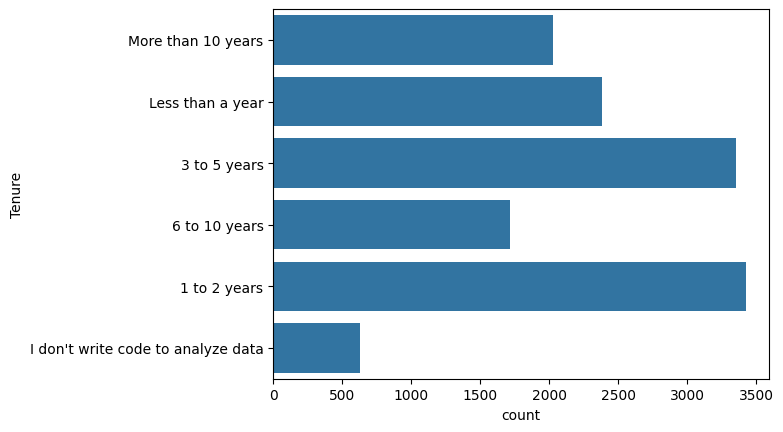

In [42]:
#프로그래밍 경험
sns.countplot(y='Tenure', data=mcq)

In [43]:
korea = mcq.loc[mcq['Country'] == 'South Korea']
korea.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
356,Male,South Korea,27.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,Female,South Korea,36.0,Employed full-time,NaN,NaN,No,Yes,Researcher,Fine,...,Very Important,Very Important,Very Important,Somewhat important,Somewhat important,Very Important,Somewhat important,Not important,Not important,Not important
491,Male,South Korea,34.0,Employed part-time,NaN,NaN,Yes,NaN,Scientist/Researcher,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565,Male,South Korea,53.0,Employed full-time,NaN,NaN,Yes,NaN,Researcher,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,Male,South Korea,35.0,Employed full-time,NaN,NaN,No,Yes,Programmer,Fine,...,Very Important,Not important,Not important,Not important,Somewhat important,Somewhat important,Very Important,Not important,Somewhat important,Not important


In [44]:
print('The number of interviewees in Koran:' + str(korea.shape[0]))

The number of interviewees in Koran:194


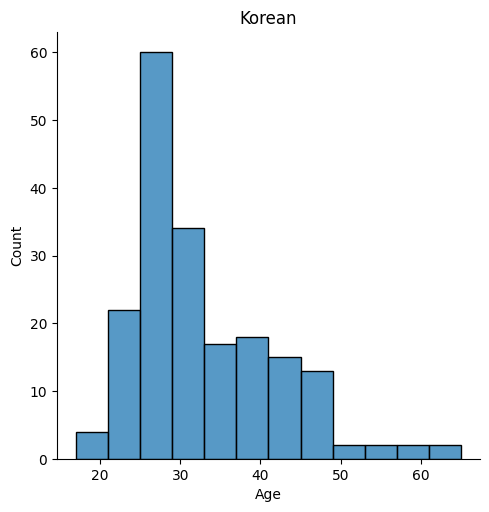

In [45]:
sns.displot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

In [46]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,count
GenderSelect,
Male,156
Female,37
A different identity,1


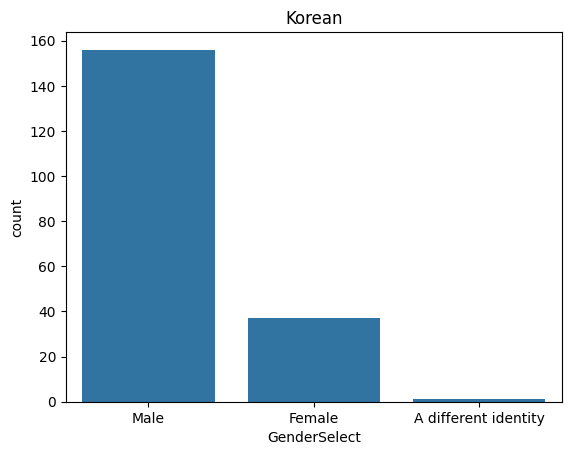

In [47]:
sns.countplot(x='GenderSelect', data=korea)
plt.title('Korean')
plt.show()

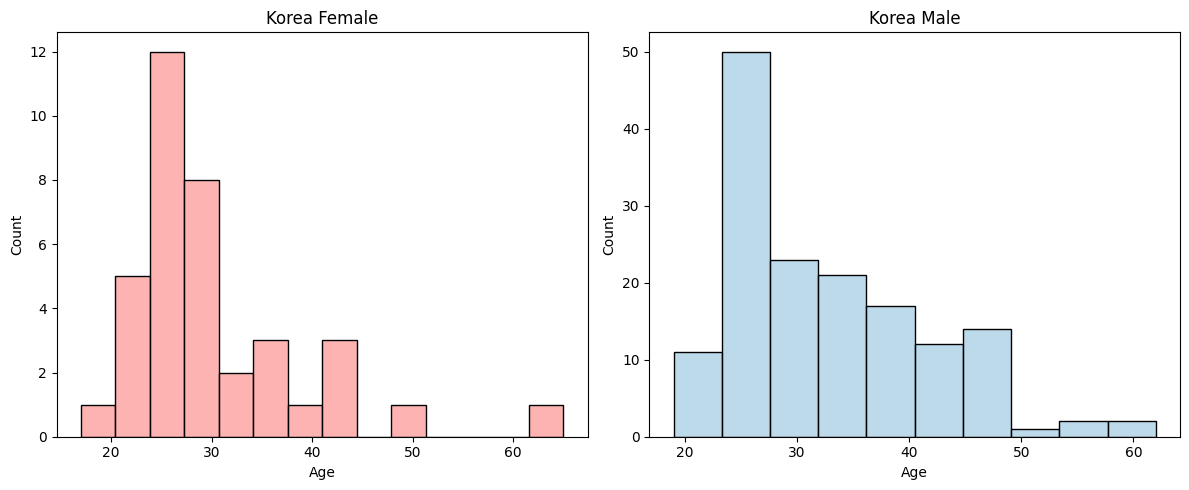

In [52]:
#성별을 연령대별로 그리기

#gpt 도움
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 준비 (여기서는 예시로 사용)
# korea = pd.DataFrame({'Age': ages, 'GenderSelect': genders})

# 서브플롯 생성
figure, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Female 데이터 시각화
sns.histplot(korea['Age'].loc[korea['GenderSelect'] == 'Female'].dropna(),
             color=sns.color_palette("Paired")[4], ax=ax1, kde=False)
ax1.set_title('Korea Female')

# Male 데이터 시각화
sns.histplot(korea['Age'].loc[korea['GenderSelect'] == 'Male'].dropna(),
             color=sns.color_palette("Paired")[0], ax=ax2, kde=False)
ax2.set_title('Korea Male')

# 그래프 레이아웃 조정
plt.tight_layout()
plt.show()

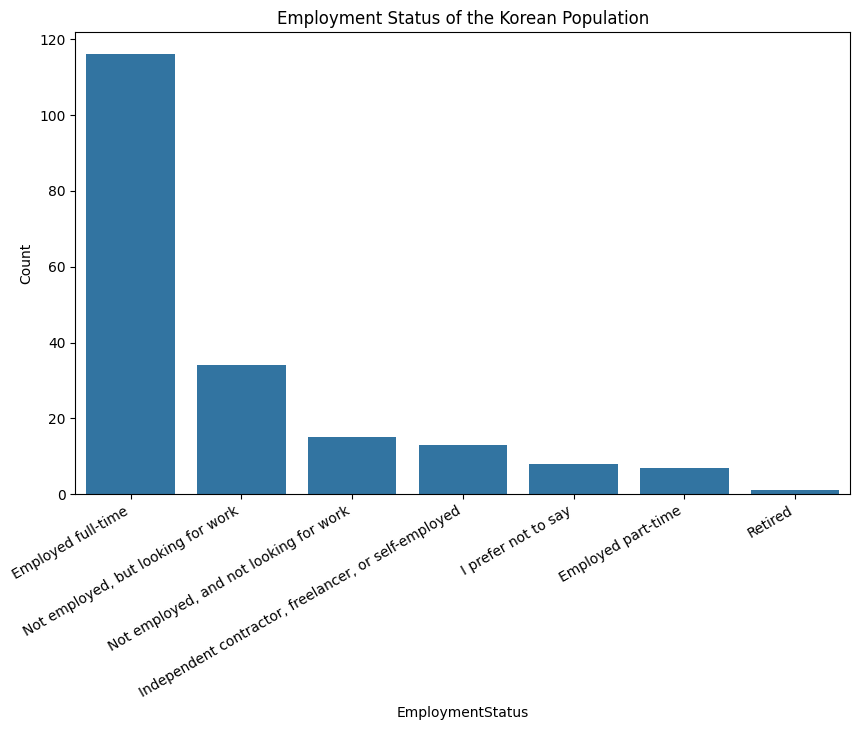

In [54]:
#gpt 도움
#plt.xticks(rotation=30, ha='right') 글자 기울이기

# EmploymentStatus의 고유 값과 그 개수 계산
status_counts = korea['EmploymentStatus'].value_counts()

# 서브플롯 생성
plt.figure(figsize=(10, 6))

# 바 플롯 생성
sns.barplot(x=status_counts.index, y=status_counts.values)

# 그래프 설정
plt.xticks(rotation=30, ha='right')
plt.title('Employment Status of the Korean Population')
plt.ylabel('Count')

# 그래프 표시
plt.show()

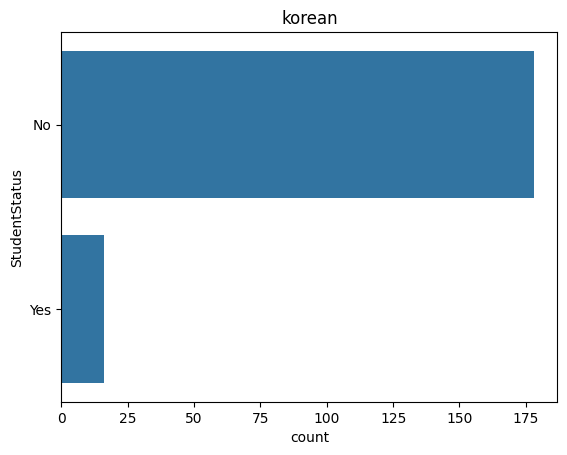

In [55]:
#학생 여부 응답
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(y='StudentStatus', data=korea)
plt.title('korean')
plt.show()